In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# parameters of the true (unknown) demand model
true_slop = 30
true_intercept = -5

In [16]:
eta = 0.999
num_episodes = 1000
stock = 200
prices = [1.99, 2.49, 2.99, 3.49, 3.99, 4.49]
horizon_steps = 5
initial_price = 5
lambda2 = 0.01

In [17]:
def retrieve_linear_demand(a): 
    demand = true_slop + true_intercept * prices[a]
    return np.random.poisson(demand, 1)[0]

In [18]:
Q = np.zeros((stock+1,len(prices)),dtype=float)

In [19]:
num_visited = np.zeros((stock+1,len(prices)), dtype=float)

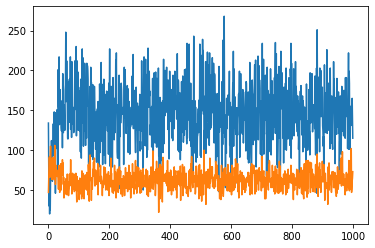

In [20]:
rList = []
dList = []
for k in range(num_episodes):
    x = stock
    a = initial_price
    num_visited[x][a] = num_visited[x][a] + 1
    r_acum = 0
    d_acum = 0
    for t in range(horizon_steps):
        observed_demand = retrieve_linear_demand(a)
        x_ = x - observed_demand
        if (x_ < 0):
            x_ = 0
            observed_demand = x
        r = observed_demand * a
        r_acum = r_acum + r
        d_acum = d_acum + observed_demand
        if np.random.uniform(0, 1) <= (1/(k+1)):
            a_ = np.random.choice(len(prices))
            greedy = False
        else:
            a_ = np.argmax(Q, axis=1)[x_]
            greedy = True
        num_visited[x_][a_] = num_visited[x_][a_] + 1
        delta = r + eta * Q[x_][a_] - Q[x][a]
        for xx in range(stock):
            for aa in range(len(prices)):
                Q[xx][aa] = Q[xx][aa] + (1 / (num_visited[xx][aa] + 1)) * delta
        x = x_
        a = a_
    rList.append(r_acum)
    dList.append(d_acum)
plt.plot(rList)
plt.plot(dList)

In [24]:
rList

[134,
 84,
 30,
 55,
 20,
 88,
 25,
 60,
 103,
 67,
 112,
 78,
 70,
 61,
 89,
 95,
 133,
 94,
 139,
 148,
 136,
 105,
 147,
 46,
 145,
 117,
 109,
 108,
 102,
 151,
 126,
 67,
 201,
 154,
 152,
 217,
 132,
 158,
 176,
 159,
 151,
 140,
 128,
 124,
 141,
 162,
 103,
 196,
 187,
 122,
 151,
 144,
 157,
 143,
 125,
 175,
 182,
 248,
 161,
 161,
 212,
 176,
 162,
 115,
 114,
 145,
 185,
 185,
 185,
 189,
 135,
 153,
 217,
 126,
 180,
 171,
 116,
 211,
 139,
 147,
 154,
 133,
 146,
 122,
 129,
 150,
 182,
 212,
 151,
 173,
 216,
 230,
 118,
 166,
 212,
 142,
 183,
 198,
 125,
 179,
 136,
 174,
 132,
 124,
 160,
 98,
 189,
 121,
 90,
 146,
 157,
 227,
 134,
 216,
 154,
 105,
 143,
 195,
 124,
 209,
 184,
 134,
 106,
 175,
 176,
 115,
 209,
 155,
 206,
 200,
 189,
 152,
 83,
 126,
 159,
 89,
 121,
 180,
 115,
 204,
 92,
 185,
 146,
 160,
 145,
 98,
 182,
 88,
 169,
 111,
 141,
 180,
 163,
 136,
 132,
 101,
 133,
 148,
 85,
 114,
 150,
 152,
 106,
 161,
 84,
 93,
 79,
 110,
 183,
 161,
 97,
 1